# Caso 1: Clasificación de flores (dataset IRIS)

In [1]:
# Importar las librerías

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
# Descarga y lectura del DataFrame
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
# Visualización del DataFrame
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# Información del DataFrame

print(f"INFORMACIÓN GENERAL - \n")
print(df_iris.info(),"\n")
print(f"DATA FALTANTE - \n")
print(df_iris.isnull().sum(),"\n")
print(f"FORMA DEL DATAFRAME - \n")
print(df_iris.shape)

INFORMACIÓN GENERAL - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None 

DATA FALTANTE - 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64 

FORMA DEL DATAFRAME - 

(150, 5)


In [5]:
# Separación de features y label

X = df_iris.drop(["target"],axis=1).values
y = df_iris["target"].values

In [6]:
# Separación de data de entrenamiento y de testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
# Entrenamiento y ejecución de normalizador
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Visualización de X normalizada
X_train

array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
       [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
       [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
       [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
       [ 1.63643991,  1.41631528,  1.30142668,  1.70589097],
       [-0.17225683, -0.26270364,  0.19235097,  0.08245999],
       [ 2.11875905, -0.02284379,  1.59328871,  1.16474731],
       [-0.29283662, -0.02284379,  0.36746819,  0.35303182],
       [-0.89573553,  1.17645543, -1.44207638, -1.40568508],
       [ 2.23933883, -0.50256349,  1.65166111,  1.0294614 ],
       [-0.05167705, -0.74242333,  0.13397857, -0.32339776],
       [-0.77515575,  0.93659559, -1.44207638, -1.40568508],
       [-1.01631531,  1.17645543, -1.50044878, -1.27039917],
       [-0.89573553,  1.89603497, -1.15021435, -1.13511325],
       [-1.01631531, -2.42144225, -0.21625586, -0.32339776],
       [ 0.55122187, -0.74242333,  0.60095781,  0.75888956],
       [-1.25747488,  0.

In [9]:
# Conversión de datos en tensores

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [10]:
# Diseño de la arquitectura de la red neuronal

class NeuralNetworkClassificationModel(nn.Module):

    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.softmax(self.output_layer(out))
        return out

In [11]:
# Función de entrenamiento

def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test,
                  num_epochs, train_losses, test_losses):

    for epoch in range(num_epochs):

        # Limpiar los gradientes del último backpropagation de loss.backward()
        optimizer.zero_grad()

        # Forward feed: predicción el modelo
        output_train = model(X_train)

        # Cálculo de error
        loss_train = criterion(output_train, y_train)
        # Cálculo del gradiente por backpropagation
        loss_train.backward()

        # Actualización de pesos
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")


In [12]:
# Instanciación de modelo

n_features = X_train.shape[1]
n_classes = len(np.unique(y))
input_dim  = n_features
output_dim = n_classes

model = NeuralNetworkClassificationModel(input_dim, output_dim)

print(model)

NeuralNetworkClassificationModel(
  (input_layer): Linear(in_features=4, out_features=128, bias=True)
  (hidden_layer1): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [13]:
# Declaración de insumos para entrenamiento

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [14]:
# Ejecutar entrenamiento

train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test,
              num_epochs, train_losses, test_losses)

Epoch 50/1000, Train Loss: 0.5636, Test Loss: 0.5517
Epoch 100/1000, Train Loss: 0.5613, Test Loss: 0.5521
Epoch 150/1000, Train Loss: 0.5611, Test Loss: 0.5519
Epoch 200/1000, Train Loss: 0.5611, Test Loss: 0.5517
Epoch 250/1000, Train Loss: 0.5610, Test Loss: 0.5517
Epoch 300/1000, Train Loss: 0.5610, Test Loss: 0.5516
Epoch 350/1000, Train Loss: 0.5610, Test Loss: 0.5516
Epoch 400/1000, Train Loss: 0.5610, Test Loss: 0.5516
Epoch 450/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 500/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 550/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 600/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 650/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 700/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 750/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 800/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 850/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 900/1000, Train Loss: 0.5610, Test Loss: 0.5515
Epoch 950/1000, Train Loss: 0

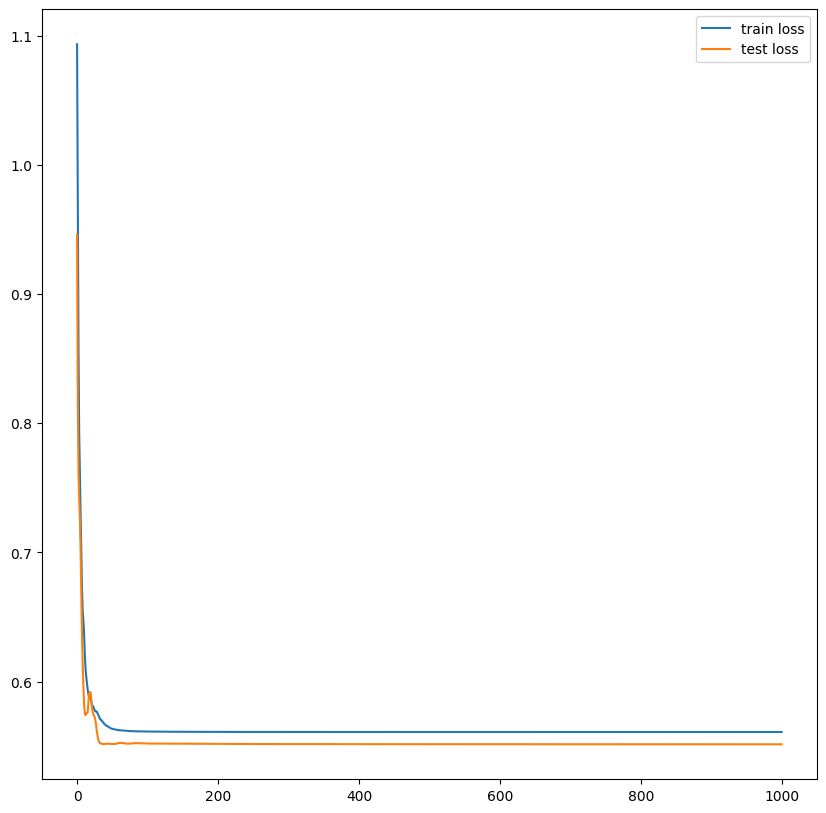

In [15]:
# Gráfica de análisis de error de entrenamiento vs error de testeo durante las iteraciones

plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [16]:
# Obtención de predicciones de entrenamiento y testeo

predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [17]:
# Función de cálculo de precisión

def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []

    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0

    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [18]:
# Cálculo de precisión de entrenamiento y testeo

train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 99.048
Test Accuracy: 100.0
